<h1 style="color: #00BFFF;">00 |</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# 🤖 Machine Learning
from sklearn.linear_model import LinearRegression
from scipy.stats import skew # data distribution assymmetry

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [4]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

<h1 style="color: #00BFFF;">03 | Exploratory Data Analysis (EDA)</h1>

In [5]:
# Quick exploration
cleaned.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year,house_lifetime,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1986.620318,12758.283512,2014.322962,49.617678,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,685.230472,27274.441950,0.467619,28.808668,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000,2014.000000,8.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,2014.000000,24.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,2014.000000,46.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,2015.000000,69.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,2015.000000,123.000000,7.700000e+06


<h2 style="color: #008080;">Dealing with Duplicates</h2>

In [6]:
explore_data(cleaned)

There are 2 duplicate rows. Also;


,NaN,EmptySpaces
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0
grade,0,0
sqft_above,0,0


In [7]:
# So, nothing to do here, moving on!

<h2 style="color: #008080;">Dealing with Data distributions</h2>

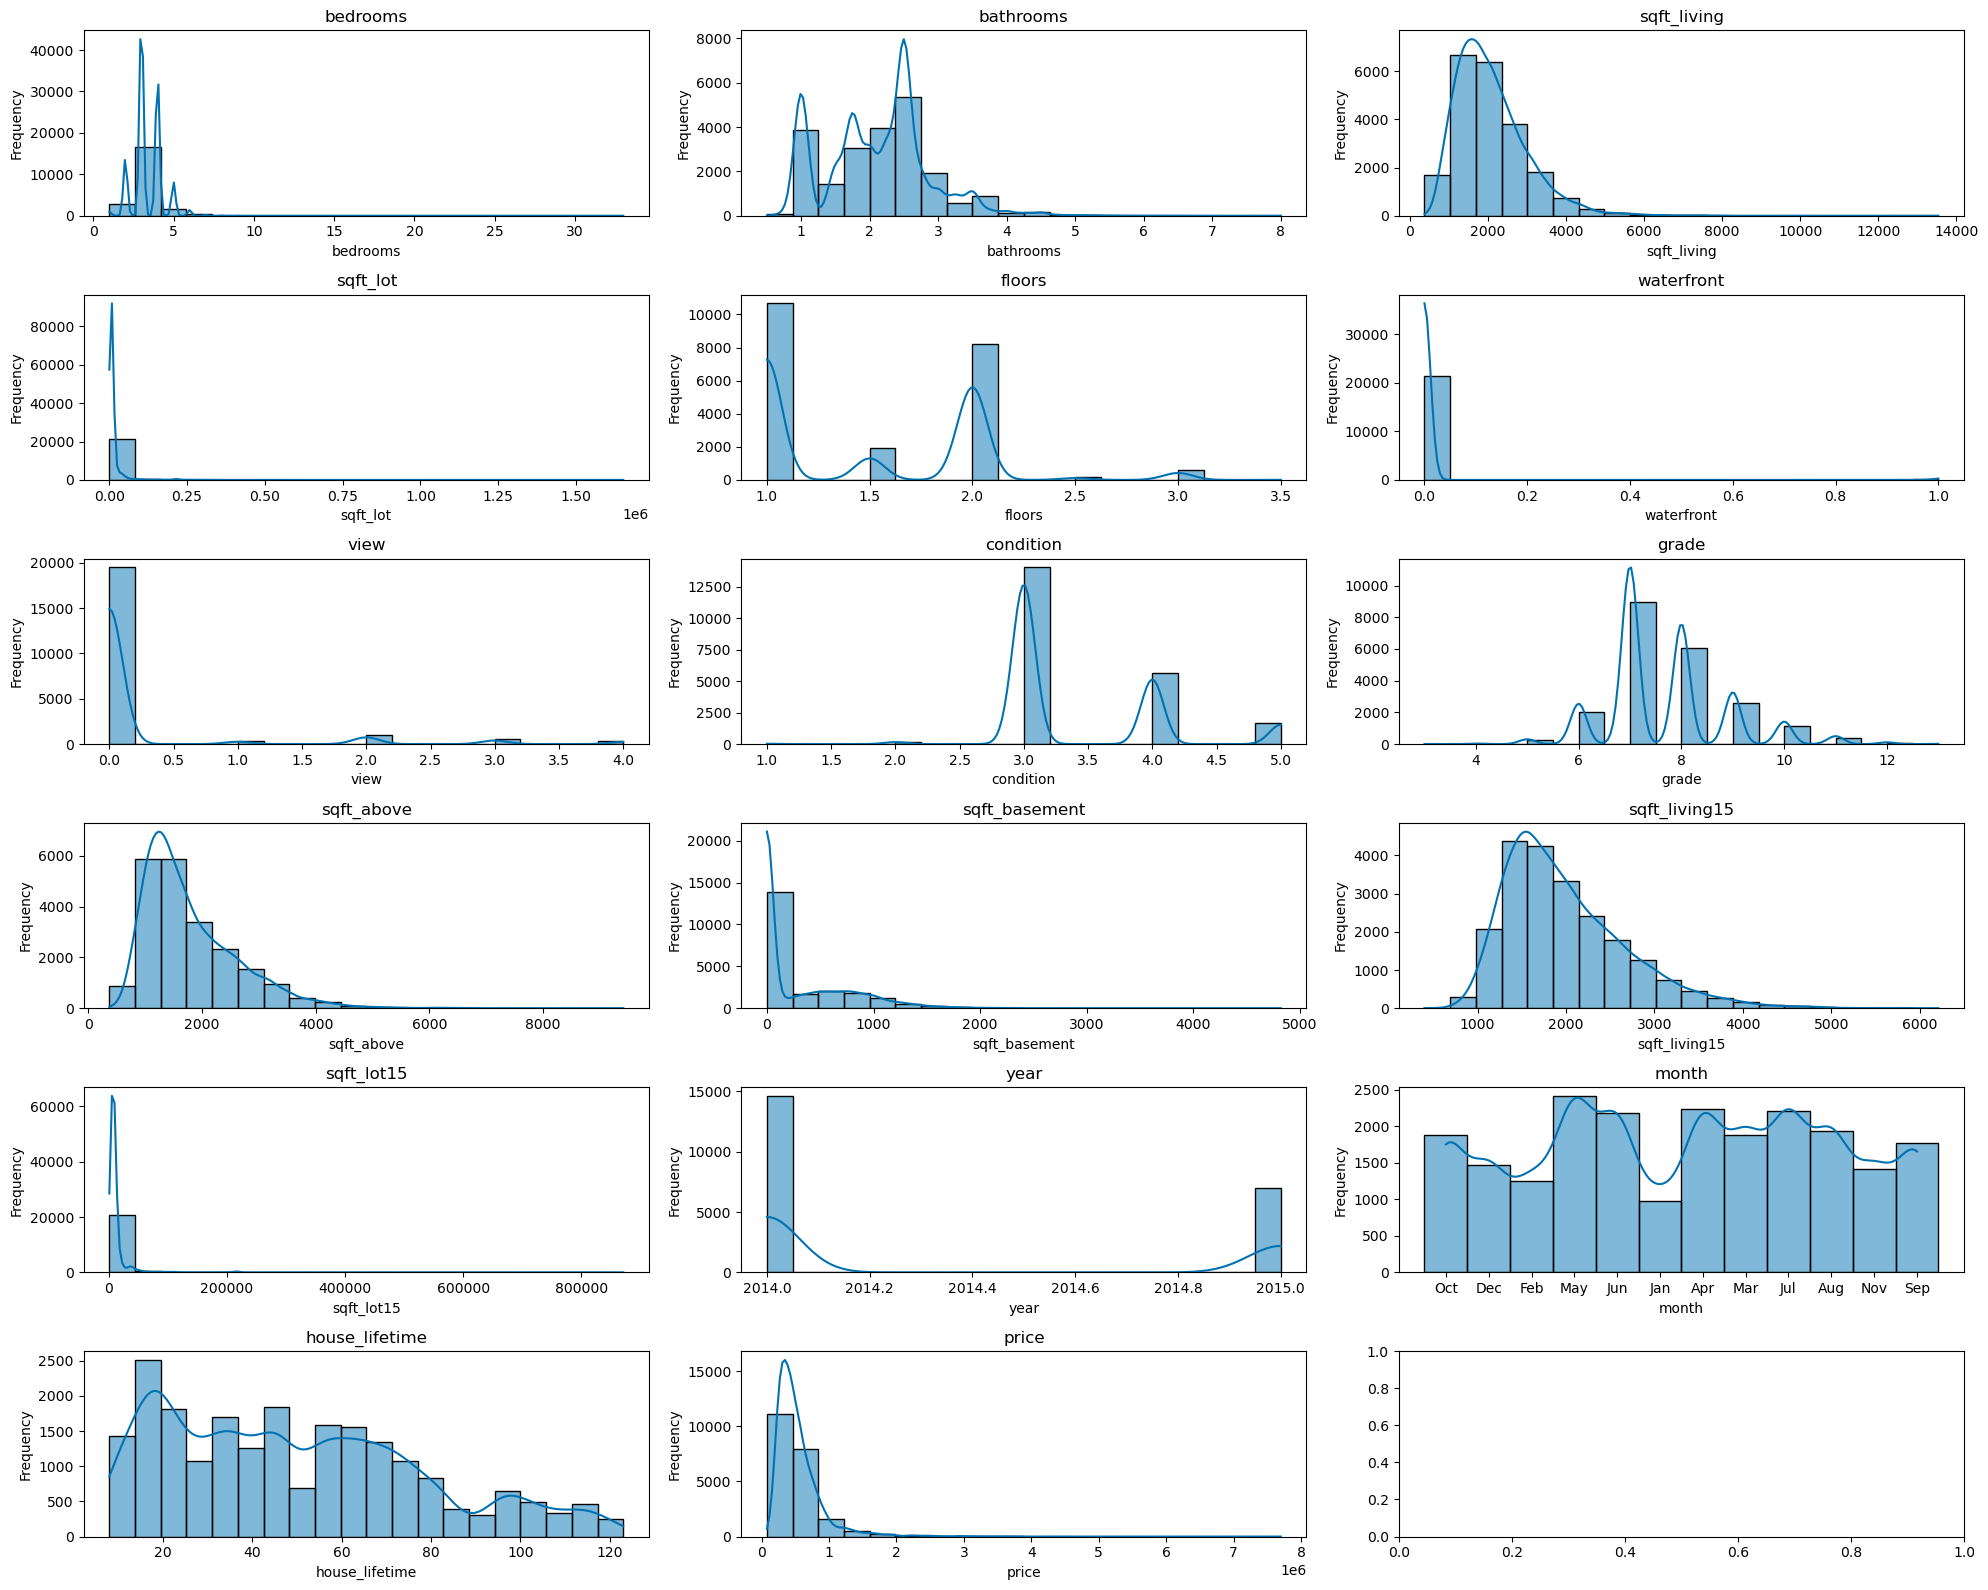

In [9]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 16)) 
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(cleaned.columns):
        break
    sns.histplot(data=cleaned, x=cleaned.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(cleaned.columns[i])
    ax.set_xlabel(cleaned.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

* **bathrooms**, **sqft_living**, **sqft_above**, **sqft_living15** and **house_lifetime** are good targets for the log transform, to make it more like a bell-shape distribution:

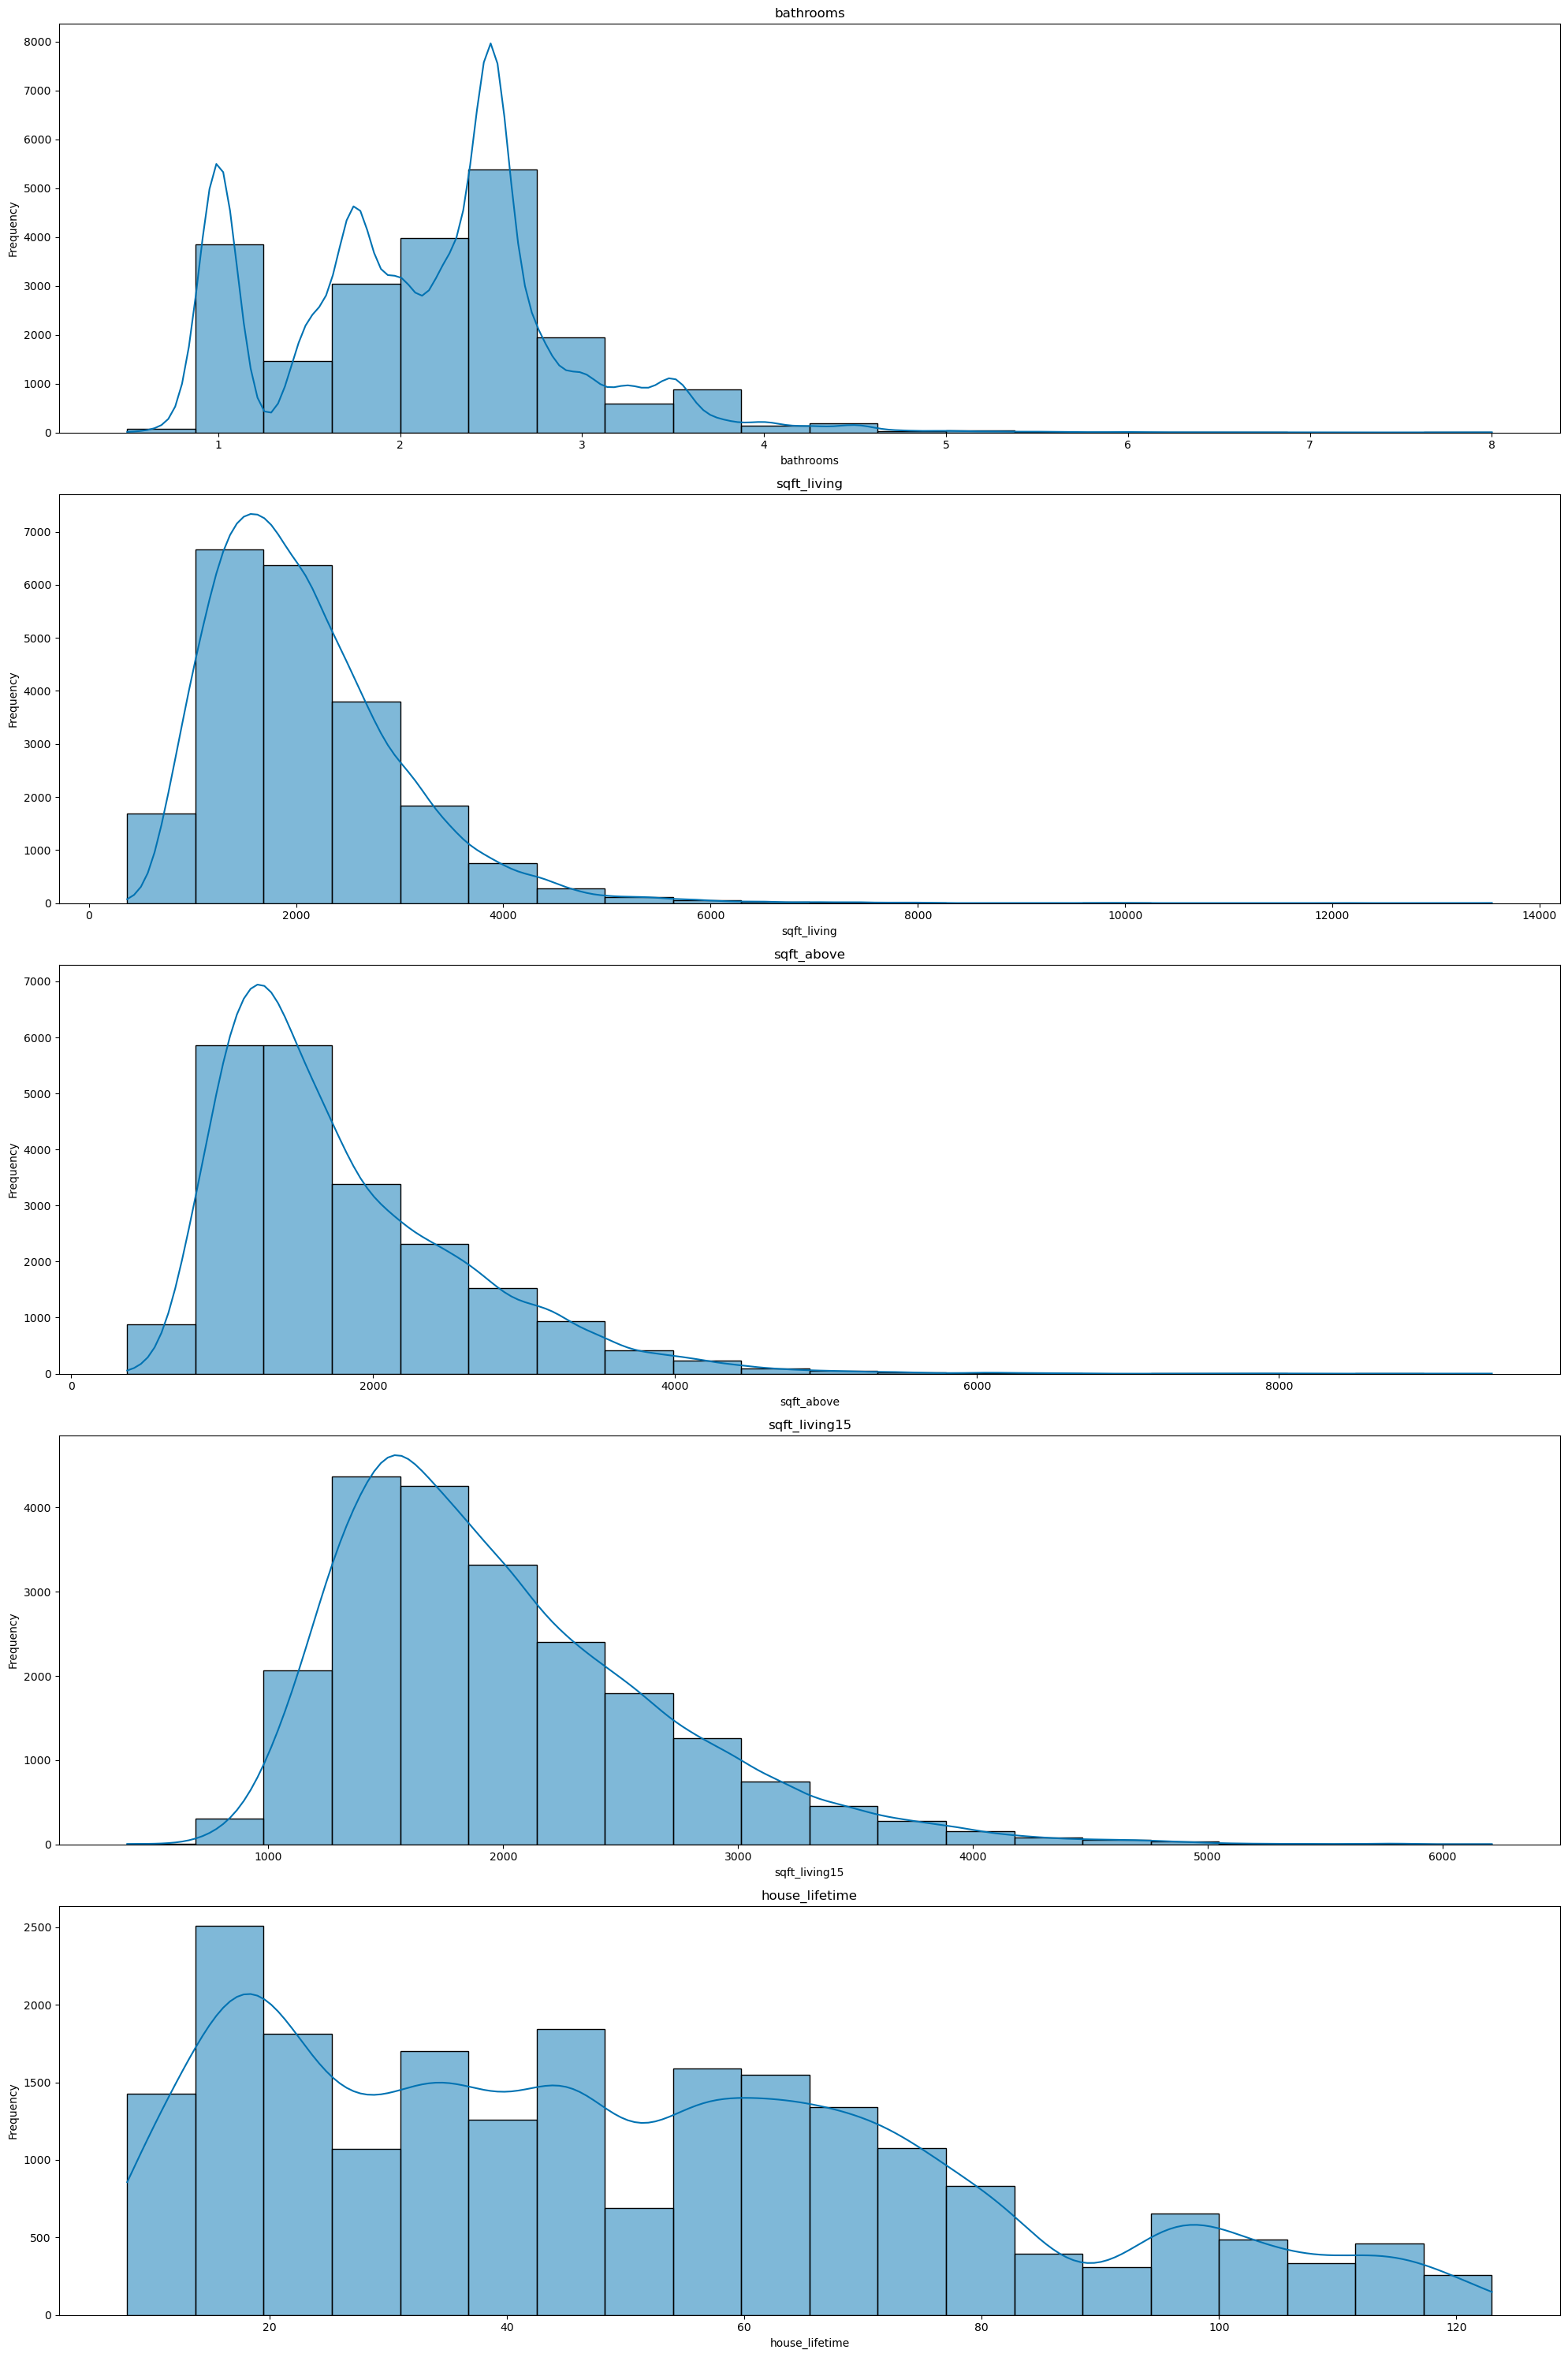

In [10]:
log_columns = ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'house_lifetime']

# Plot the histograms for the original columns
fig, axes = plt.subplots(nrows=len(log_columns), ncols=1, figsize=(20, 30)) 
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(log_columns):
        break
    sns.histplot(data=cleaned, x=log_columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(log_columns[i])
    ax.set_xlabel(log_columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
log_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'house_lifetime']

for column in log_columns:
    cleaned[f'{column}_log'] = np.log(cleaned[column])

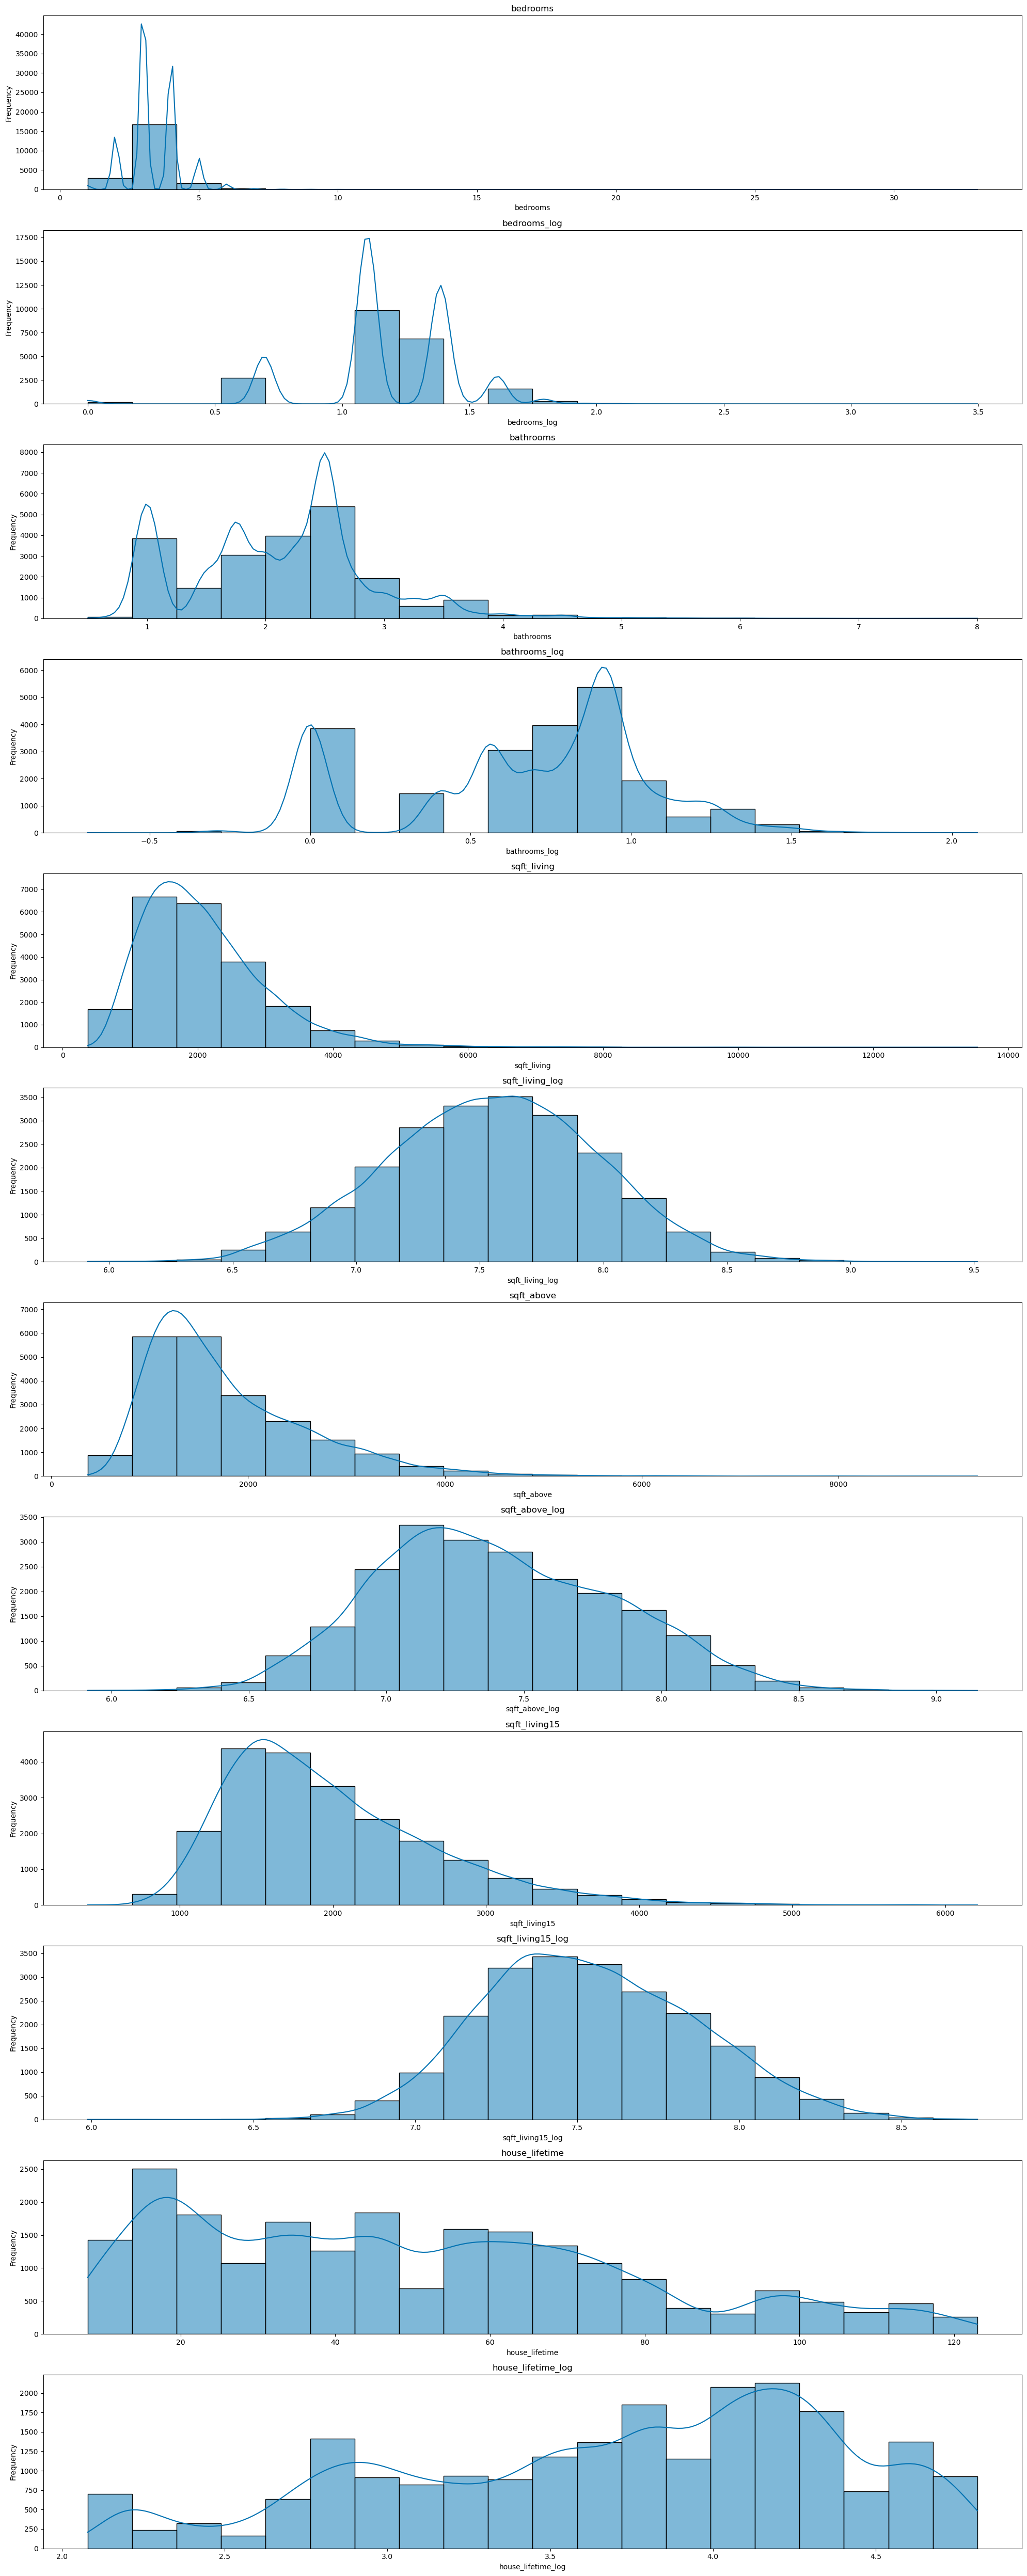

In [12]:
# Create a list of original and transformed column names
column_names = []
for column in log_columns:
    column_names.append(column)
    column_names.append(f'{column}_log')

fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(20, 50)) 
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(column_names):
        break
    sns.histplot(data=cleaned, x=column_names[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(column_names[i])
    ax.set_xlabel(column_names[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
['column_name_log'] = np.log(data['column_name'])


In [18]:
# Calculate skewness for all numeric columns
skew_values = cleaned.select_dtypes(include=[np.number]).apply(skew)
print(skew_values)

bedrooms           2.023501
bathrooms          0.519673
sqft_living        1.473113
sqft_lot          13.071696
floors             0.614454
waterfront        11.380006
view               3.396000
condition          1.035965
grade              0.788182
sqft_above         1.447334
sqft_basement      1.576780
sqft_living15      1.106799
sqft_lot15         9.523700
year               0.757209
house_lifetime     0.556148
price              4.023085
dtype: float64


<h2 style="color: #008080;">Dealing with Outliers</h2>

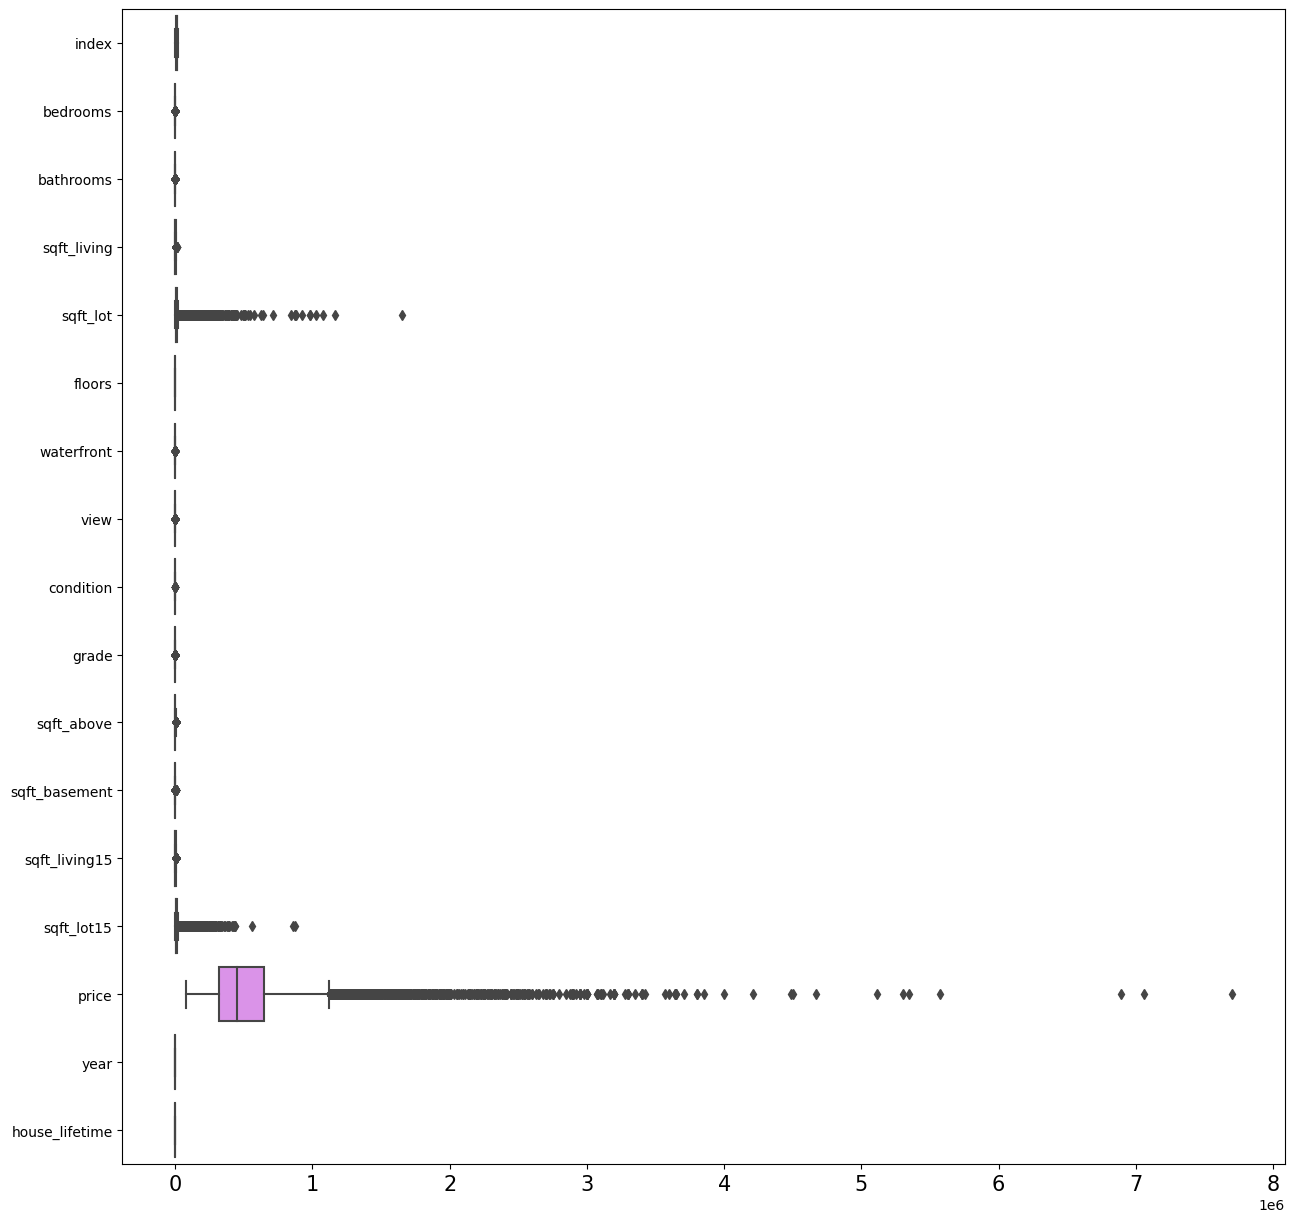

In [23]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=cleaned, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [28]:
outlier_slayer(cleaned)

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,year,month,house_lifetime
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,221900,2014,Oct,68
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,538000,2014,Dec,32
2,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,180000,2015,Feb,90
3,3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,604000,2014,Dec,58
4,4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,510000,2015,Feb,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,360000,2014,May,14
21593,21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,400000,2015,Feb,9
21594,21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,402101,2014,Jun,14
21595,21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,400000,2015,Jan,19


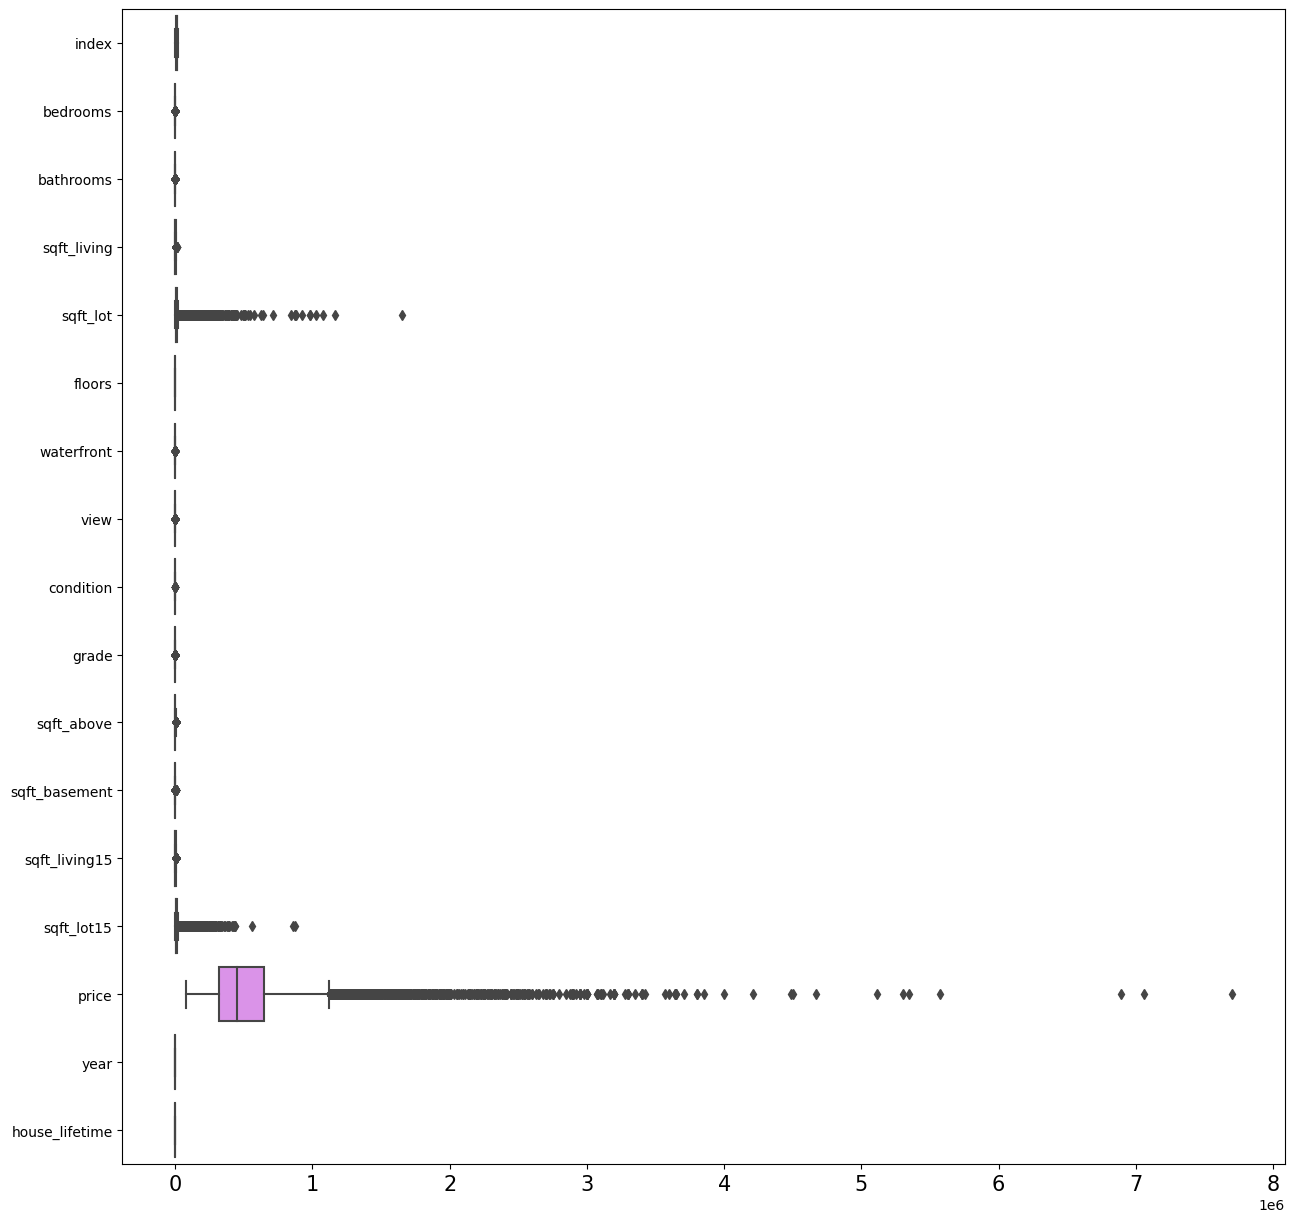

In [29]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=cleaned, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

<h2 style="color: #008080;">Dealing with Skewness</h2>

In [27]:
# Assuming your DataFrame is named cleaned
numeric_columns = cleaned.select_dtypes(include=[np.number])

# Calculate skewness only for numeric columns
skew_values = numeric_columns.apply(skew)
print(skew_values)

index              0.000000
bedrooms           2.023501
bathrooms          0.519673
sqft_living        1.473113
sqft_lot          13.071696
floors             0.614454
waterfront        11.380006
view               3.396000
condition          1.035965
grade              0.788182
sqft_above         1.447334
sqft_basement      1.576780
sqft_living15      1.106799
sqft_lot15         9.523700
price              4.023085
year               0.757209
house_lifetime     0.556148
dtype: float64


As a reminder, Skewness > 1 or < -1 indicates a highly skewed distribution.

In our case, our skwewness are all < 1 & > -1

<h2 style="color: #008080;">Dealing with Multicollinearity</h2>

<h2 style="color: #008080;">Dealing with Imbalanced Data</h2>

<h1 style="color: #00BFFF;">03 | Explanatory Data Analysis (EDA)</h1>

<h2 style="color: #008080;">Data Extraction</h2>

We will use our data_copy dataset for this

In [12]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "datac.csv")
datac = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column
datac = datac.reset_index()

In [13]:
cleaned = cleaned.drop('month', axis=1) # Temporary, it's still not encoded

<h2 style="color: #008080;">Most important features</h2>

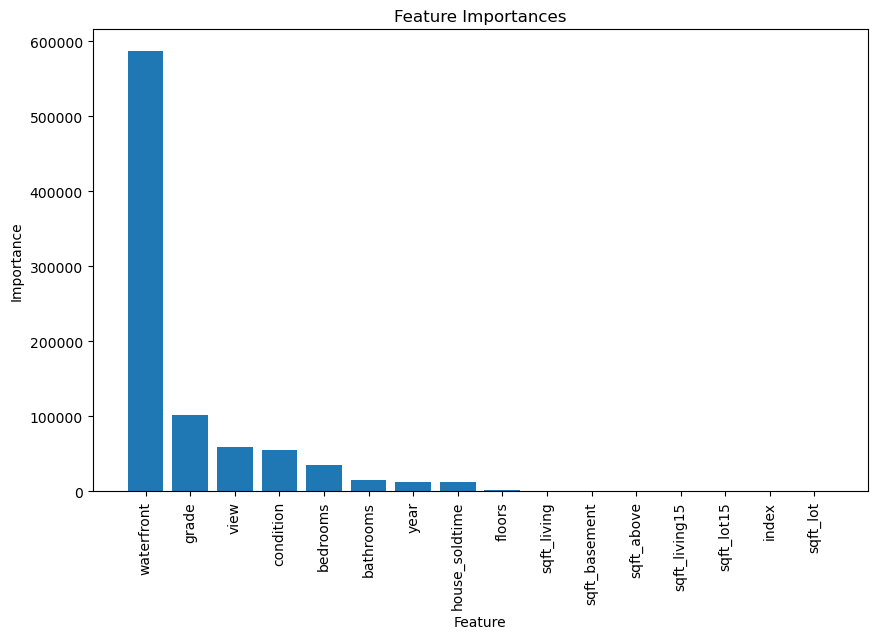

In [14]:
# Split the data into input and target variables
X = cleaned.drop("price", axis=1)
y = cleaned["price"]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Calculate the feature importances
importances = np.abs(model.coef_)
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

<h2 style="color: #008080;">What can we do with zipcodes?</h2>

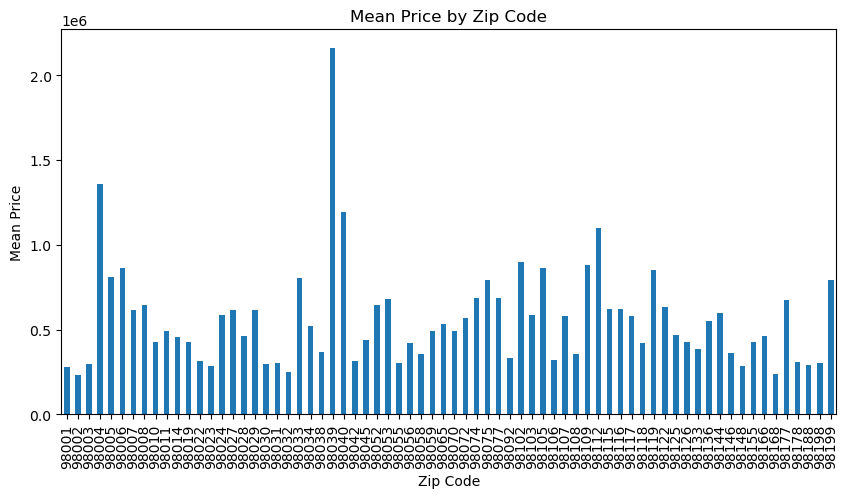

In [16]:
# Group the data by zip code and calculate the mean price for each group
mean_price_by_zip = datac.groupby('zipcode')['price'].mean()

# Plot the mean price by zip code
mean_price_by_zip.plot(kind='bar', figsize=(10, 5))
plt.title('Mean Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.show()

<h2 style="color: #008080;">Calculating the mean price by location</h2>

Using lat, long and price

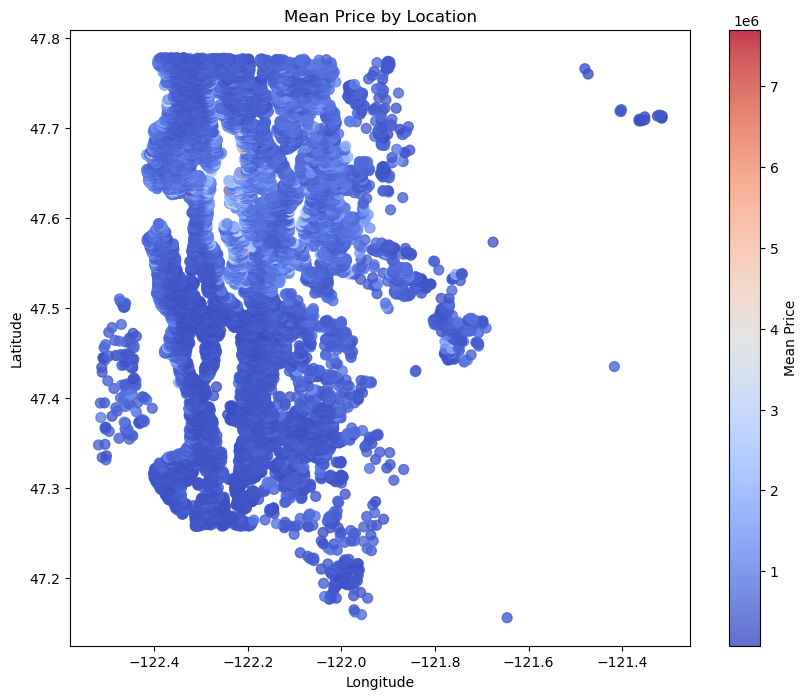

In [18]:
# Group the data by latitude and longitude and calculate the mean price for each group
mean_price_by_location = datac.groupby(['lat', 'long'])['price'].mean().reset_index()

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(mean_price_by_location['long'], mean_price_by_location['lat'], s=50, c=mean_price_by_location['price'], cmap='coolwarm', alpha=0.8)

# Add a color bar
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mean Price')

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Price by Location')

# Show the plot
plt.show()